In [23]:
# %pip freeze > requirements.txt

In [24]:
# %pip install scikit-learn

**CAPITULO 24 Y 25: INTRODUCCION A LA MINERIA DE DATOS CON PCA**

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

In [26]:
dictionary = pd.read_csv('data/data-dictionary.csv')
dfp = pd.read_csv('data/Country-data.csv')
# dictionary
dfp

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [27]:
pca_model = PCA(n_components=2)
# df_pca = pca_model.fit_transform(dfp.iloc[:, :-1])
df_pca = pca_model.fit_transform(dfp.iloc[:, 1:])
# df_pca

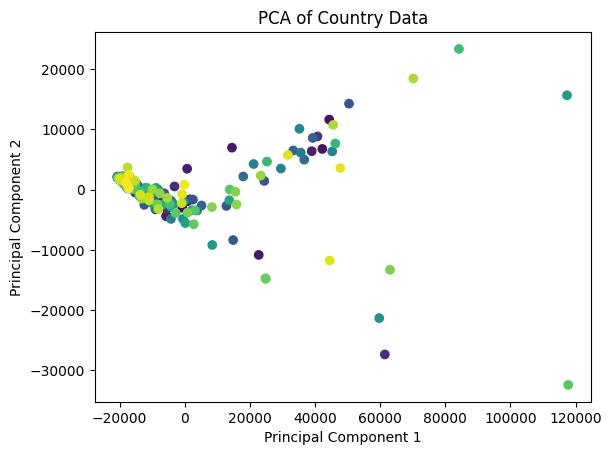

In [28]:
plt.scatter(x=df_pca[:, 0], y=df_pca[:, 1], c=dfp['country'].astype('category').cat.codes)
plt.title('PCA of Country Data')
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 1')
plt.show()

**CAPITULO 26: TECNICA DE TRANSFORMACION DE VARIABLES**

In [29]:
df_penguins = pd.read_csv('data/penguins.csv')
df_penguins = df_penguins.dropna()
df_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


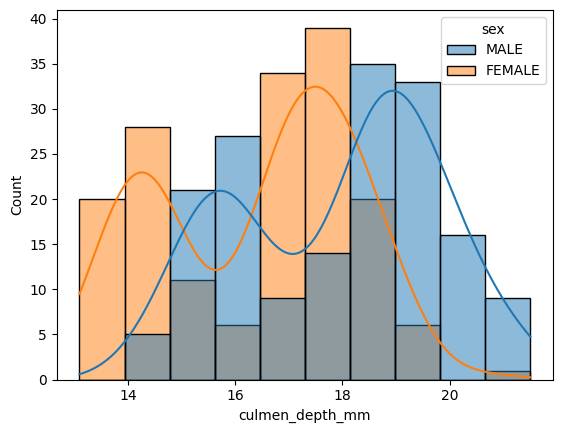

In [30]:
sns.histplot(data=df_penguins, x='culmen_depth_mm', hue='sex', kde=True)
plt.xlabel('culmen_depth_mm')
plt.ylabel('Count')
plt.show()

In [31]:
# Apply log only to positive values and drop NaNs
for col in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    df_penguins = df_penguins[df_penguins[col] > 0]
    df_penguins[col] = np.log(df_penguins[col])


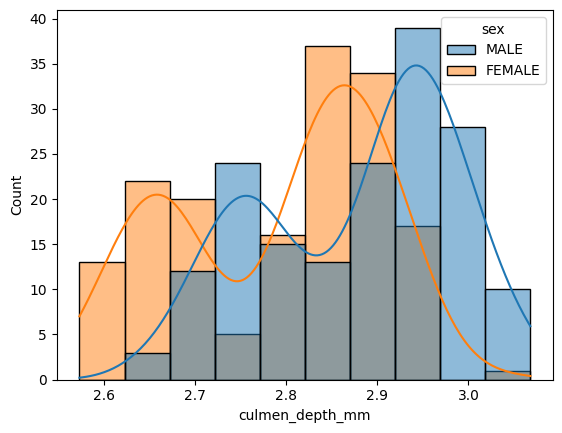

In [32]:
sns.histplot(data=df_penguins, x='culmen_depth_mm', hue='sex', kde=True)
plt.xlabel('culmen_depth_mm')
plt.ylabel('Count')
plt.show()

**CAPITULO 27: NORMALIZACION DE DATOS**

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

stds = StandardScaler()
mms = MinMaxScaler()

In [34]:
df_penguins_scaled = stds.fit_transform(df_penguins.iloc[:, :-1])
df_penguins_scaled

array([[-0.88732552,  0.79336938, -0.59215653, -0.51580495],
       [-0.80573103,  0.17550382, -0.44801273, -0.4454103 ],
       [-0.64499202,  0.46621356, -0.19805676, -1.27634563],
       ...,
       [ 1.1478357 , -0.70609951,  0.48790655,  1.75593959],
       [ 0.2748765 , -1.21231889,  0.2440961 ,  1.22159128],
       [ 1.06790892, -0.49036195,  0.26898909,  1.42217049]],
      shape=(333, 4))

In [35]:
df_penguins_normal = mms.fit_transform(df_penguins.iloc[:, :-1])
df_penguins_normal

array([[0.31878892, 0.71837314, 0.01513564, 0.38770789],
       [0.33523722, 0.57294036, 0.02322231, 0.40334021],
       [0.36763996, 0.64136742, 0.03724519, 0.21881706],
       ...,
       [0.72904893, 0.36542916, 0.0757287 , 0.89218694],
       [0.55307257, 0.24627559, 0.06205059, 0.77352591],
       [0.71293681, 0.41620933, 0.06344712, 0.8180679 ]], shape=(333, 4))

**CAPITULO 28: CORRELACION DE DATOS**

In [36]:
#calcular la correlacion de
corr, _ = pearsonr(df_penguins['culmen_length_mm'], df_penguins['culmen_depth_mm'])
print(f'Pearson correlation between culmen_length_mm and culmen_depth_mm: {corr:.2f}')

Pearson correlation between culmen_length_mm and culmen_depth_mm: -0.24


In [37]:
correlation_matrix = df_penguins.select_dtypes(include=[np.number]).corr()
correlation_matrix

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.240468,0.225052,0.601162
culmen_depth_mm,-0.240468,1.000000,-0.138851,-0.468025
flipper_length_mm,0.225052,-0.138851,1.000000,0.321794
body_mass_g,0.601162,-0.468025,0.321794,1.000000


**CAPITULO 29: ANALISIS DE CLUSTERS**

In [38]:
df_penguins['sex'].unique()
# dfp['country'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [39]:
df_penguins.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [40]:
model = KMeans(n_clusters=2, random_state=42)
df_penguins['cluster'] = model.fit_predict(df_penguins.iloc[:, :-2])
df_penguins


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,3.666122,2.928524,5.198497,8.229511,MALE,0
1,3.676301,2.856470,5.225747,8.242756,FEMALE,0
2,3.696351,2.890372,5.273000,8.086410,FEMALE,0
4,3.602777,2.960105,5.262690,8.146130,FEMALE,0
5,3.671225,3.025291,5.247024,8.202482,MALE,0
...,...,...,...,...,...,...
338,3.854394,2.617396,5.365976,8.502080,FEMALE,1
340,3.845883,2.660260,5.370638,8.486734,FEMALE,1
341,3.919991,2.753661,5.402677,8.656955,MALE,1
342,3.811097,2.694627,5.356586,8.556414,FEMALE,1


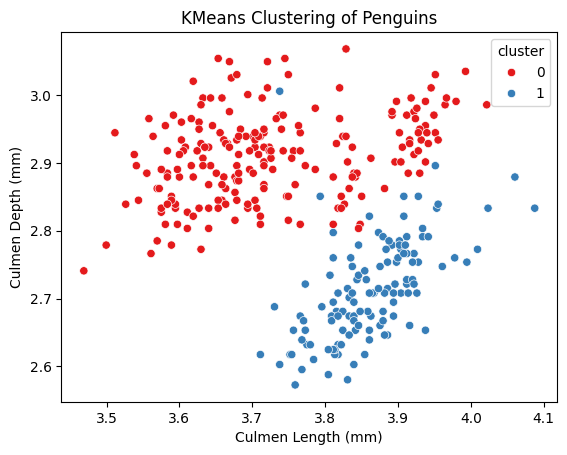

In [41]:
sns.scatterplot(data=df_penguins, x='culmen_length_mm', y='culmen_depth_mm', hue='cluster', palette='Set1')
plt.title('KMeans Clustering of Penguins')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()

**CAPITULO 30: ANALISIS CON Z-SCORE**

In [42]:
df_penguins["culmen_length_mm_z-score"] = np.abs(
    (df_penguins["culmen_length_mm"] - df_penguins["culmen_length_mm"].mean())
    / df_penguins["culmen_length_mm"].std()
)
df_penguins["culmen_depth_mm_z-score"] = np.abs(
    (df_penguins["culmen_depth_mm"] - df_penguins["culmen_depth_mm"].mean())
    / df_penguins["culmen_depth_mm"].std()
)

df_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster,culmen_length_mm_z-score,culmen_depth_mm_z-score
0,3.666122,2.928524,5.198497,8.229511,MALE,0,0.885992,0.792177
1,3.676301,2.856470,5.225747,8.242756,FEMALE,0,0.804520,0.175240
2,3.696351,2.890372,5.273000,8.086410,FEMALE,0,0.644023,0.465513
4,3.602777,2.960105,5.262690,8.146130,FEMALE,0,1.393046,1.062586
5,3.671225,3.025291,5.247024,8.202482,MALE,0,0.845153,1.620723
...,...,...,...,...,...,...,...,...
338,3.854394,2.617396,5.365976,8.502080,FEMALE,1,0.621035,1.871770
340,3.845883,2.660260,5.370638,8.486734,FEMALE,1,0.552910,1.504761
341,3.919991,2.753661,5.402677,8.656955,MALE,1,1.146111,0.705039
342,3.811097,2.694627,5.356586,8.556414,FEMALE,1,0.274463,1.210497


In [43]:
outliers = df_penguins[
    (df_penguins["culmen_length_mm_z-score"] > 2) | (df_penguins["culmen_depth_mm_z-score"] > 2)
]

outliers

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster,culmen_length_mm_z-score,culmen_depth_mm_z-score
70,3.511545,2.944439,5.247024,8.188689,FEMALE,0,2.123311,0.928449
92,3.526361,2.839078,5.220356,8.131531,FEMALE,0,2.004723,0.026328
98,3.499533,2.778819,5.181784,7.972466,FEMALE,0,2.219463,0.489625
142,3.468856,2.740840,5.236442,8.022897,FEMALE,0,2.465020,0.814812
169,4.060443,2.879198,5.198497,8.216088,FEMALE,1,2.270364,0.369845
220,3.830813,2.580217,5.351858,8.411833,FEMALE,1,0.432280,2.190105
228,3.768153,2.595255,5.342334,8.389360,FEMALE,1,0.069287,2.061347
244,3.758872,2.572612,5.370638,8.517193,FEMALE,1,0.143576,2.255217
253,4.087656,2.833213,5.438079,8.707814,MALE,1,2.488188,0.023891
268,3.804438,2.587764,5.361292,8.536996,FEMALE,1,0.221159,2.125484


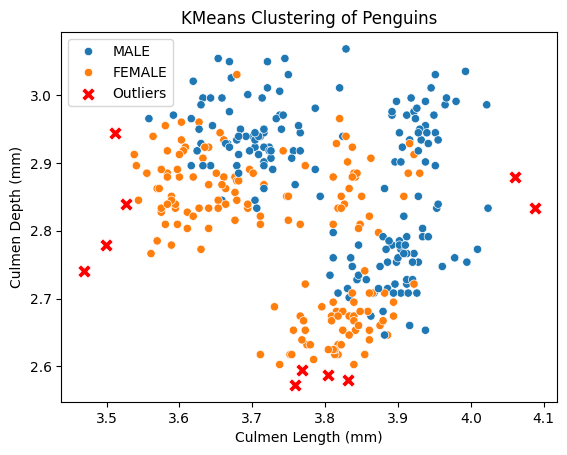

In [44]:
sns.scatterplot(data=df_penguins, x='culmen_length_mm', y='culmen_depth_mm', hue='sex')
sns.scatterplot(
    data=outliers, x='culmen_length_mm', y='culmen_depth_mm', color='red', marker='X', s=100, label='Outliers'
)
plt.title('KMeans Clustering of Penguins')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()